In [1]:
import cv2
import json
import random
import numpy as np
from PIL import Image,ImageDraw
from matplotlib import pyplot as plt
import matplotlib 

# Masks

#RGB Images and their masks
index = 23
rgb = cv2.imread(f"/Users/muxin/PyCharm/original_FreiHAND/training/rgb/{index:08d}.jpg")
mask = cv2.imread(f"/Users/muxin/PyCharm/original_FreiHAND/training/mask/{index:08d}.jpg")

plt.imshow(rgb)
plt.show()

plt.imshow(mask)
plt.show()

# Pose

In [2]:
#For Training
def load_json_files(path = '/Users/muxin/PyCharm/FreiHAND'):
    with open(f'{path}/training_K.json') as K_fp, open(f'{path}/training_xyz.json') as xyz_fp:
        K_array = json.load(K_fp)
        #verts_array = json.load(verts_fp)
        xyz_array = json.load(xyz_fp)
        
        return K_array, xyz_array #verts_array, 
    
def projectPoints(xyz, K):
    """ Project 3D coordinates into image space. """
    xyz = np.array(xyz)
    K = np.array(K)
    uv = np.matmul(K, xyz.T).T
    return uv[:, :2] / uv[:, -1:]

def renderPose(img, uv):
    connections = [[0,1], [1,2], [2,3], [3,4], 
                   [0,5], [5,6], [6,7], [7,8], 
                   [0,9], [9,10],[10,11], [11,12],
                   [0,13],[13,14], [14,15], [15,16], 
                   [0,17],[17,18], [18,19], [19,20]]
    for c in connections:
        img = cv2.line(img,uv[c[0]],uv[c[1]],(255,0,0),2)
        
    for point in uv:
        img = cv2.circle(img, point, 2, (0,0,0), -1)
        
    return img

In [12]:
def get_bbox_coordinates(coordinates):
    """
    Get bounding box coordinates for a actual hand landmark.
    Args:
        coordinates: A array of coordinates for a signle picture.
    Returns:
        A tuple of the form (xmin, ymin, xmax, ymax).
    """
    all_x, all_y = [], []  
    for coordinate in coordinates: 
        all_x.append(coordinate[0])
        all_y.append(coordinate[1])
    return min(all_x), min(all_y), max(all_x), max(all_y) 

def draw_bbox(results, image, extend, colour, is_predicted, coordinates=None):
    if is_predicted: 
        x_min, y_min, x_max, y_max = get_bbox_coordinates_mediapipe(results, image)
    else: 
        x_min, y_min, x_max, y_max = get_bbox_coordinates(coordinates)
    cv2.rectangle(image, (x_min - extend, y_min - extend), (x_max + extend, y_max + extend), colour, 1)    
    return image

def occlude_keypoint_by_rectangle(image, colour, coordinates, index):
    if index == 1: 
        extend = 3
        x_min, y_min, x_max, y_max = coordinates[0][0]-extend, coordinates[0][1]-extend, coordinates[0][0]+extend, coordinates[0][1]+extend
    else: 
        x_min, y_min, x_max, y_max = get_bbox_coordinates(coordinates[:index])
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), colour, -1)    
    return image

def occlude_keypoint_by_circle(img, keypoint_coordinates, index, radius):
    img = cv2.circle(img, keypoint_coordinates[index], radius, (0, 0, 0), -1)
    return img

def annotate_image(points, oriImg):
    edges = [[0, 1], [1, 2], [2, 3], [3, 4], [0, 5], [5, 6], [6, 7], [7, 8], [0, 9], [9, 10], \
             [10, 11], [11, 12], [0, 13], [13, 14], [14, 15], [15, 16], [0, 17], [17, 18], [18, 19], [19, 20], 
            [0,5], [5,9], [9,13], [13,17]]

    plt.imshow(oriImg[:, :, [2, 1, 0]])

#     for i, (x, y) in enumerate(points):
#         plt.plot(x, y, 'r.')
#         plt.text(x, y, str(i+1))

    for ie, e in enumerate(edges):
        rgb = matplotlib.colors.hsv_to_rgb([ie / float(len(edges)), 1.0, 1.0])
        x1, y1 = points[e[0]]
        x2, y2 = points[e[1]]
        plt.plot([x1, x2], [y1, y2], color=rgb)
    plt.axis('off')
    plt.show()

In [3]:
index = 57
K_array, xyz_array = load_json_files()
uv = projectPoints(xyz_array[index], K_array[index]).astype(np.int32)

[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 6]
[0, 1, 2, 3, 4, 7]
[0, 1, 2, 3, 4, 8]
[0, 1, 2, 3, 4, 9]
[0, 1, 2, 3, 4, 10]


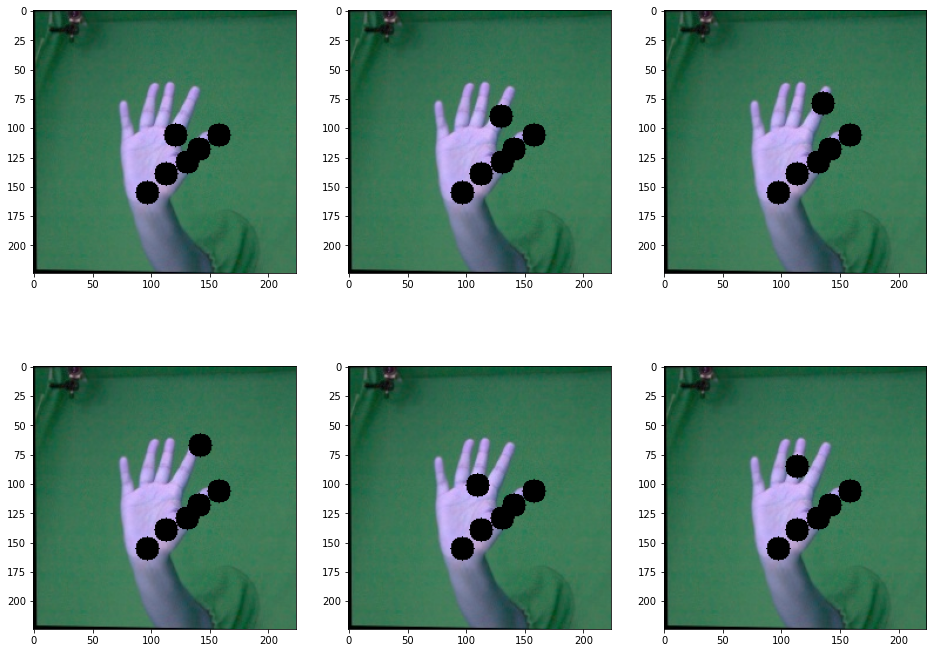

In [6]:
index = 57
# img = cv2.imread(f"/Users/muxin/PyCharm/FreiHAND/original/naked_hands/{index:08d}.jpg")
img = cv2.imread(f"/Users/muxin/PyCharm/FreiHAND/original/naked_hands/{index:08d}.jpg")

this_img = img.copy()
# occlude_keypoint_by_rectangle(img, (0, 0, 0), uv, 2)
fig = plt.figure(figsize=(16, 12))
columns, rows = 3, 2
occluded_on = [0,1,2,3,4]
for i in range(1, columns*rows +1): 
    this_img = img.copy()
    new_occluded_on = occluded_on + [i+occluded_on[-1]]
    print(new_occluded_on)
    for keypoint in new_occluded_on:
        this_img = occlude_keypoint_by_circle(this_img, uv, keypoint, 10)
    fig.add_subplot(rows, columns, i)
    plt.imshow(this_img)
plt.show()

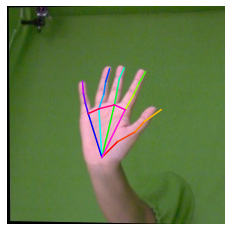

In [13]:
index = 57
img = cv2.imread(f"/Users/muxin/PyCharm/FreiHAND/original/naked_hands/{index:08d}.jpg")
this_img = img.copy()
annotate_image(uv, this_img)

In [8]:
img = renderPose(rgb, uv)
plt.imshow(img)
plt.show()

NameError: name 'rgb' is not defined

Image Intrinsic parameters

In [ ]:
print(K_array[23]) #Camera intrinsic parameters

Landmark coordinates (21 coordinates, one per landmark, each coordinate is given by 3 values) We can get pixel coordinates by multiplying it with the intrinsic parameters as np.matmul(K_array[0].T, xyz_array[0]).T (assuming K_array and xyz_array are numpy arrays)

In [ ]:
print(xyz_array[23]) #Landmark coordinates

In [46]:
import sys                      # System bindings
import cv2                      # OpenCV bindings
import numpy as np
from collections import Counter


class BackgroundColorDetector():
    def __init__(self, imageLoc):
        self.img = cv2.imread(imageLoc, 1)
        self.manual_count = {}
        self.w, self.h, self.channels = self.img.shape
        self.total_pixels = self.w*self.h

    def count(self):
        for y in range(0, self.h):
            for x in range(0, self.w):
                RGB = (self.img[x, y, 2], self.img[x, y, 1], self.img[x, y, 0])
                if RGB in self.manual_count:
                    self.manual_count[RGB] += 1
                else:
                    self.manual_count[RGB] = 1

    def average_colour(self):
        red = 0
        green = 0
        blue = 0
        sample = 10
        for top in range(0, sample):
            red += self.number_counter[top][0][0]
            green += self.number_counter[top][0][1]
            blue += self.number_counter[top][0][2]

        average_red = red / sample
        average_green = green / sample
        average_blue = blue / sample
        return (average_red, average_green, average_blue)


    def twenty_most_common(self):
        self.count()
        self.number_counter = Counter(self.manual_count).most_common(20)


    def detect(self):
        self.twenty_most_common()
        self.percentage_of_first = (
            float(self.number_counter[0][1])/self.total_pixels)
        if self.percentage_of_first > 0.5:
            return self.number_counter[0][0]
        else:
            return self.average_colour()


if __name__ == "__main__":
    BackgroundColor = BackgroundColorDetector(f"/Users/muxin/PyCharm/organised_FreiHAND/naked_hands/{index:08d}.jpg")
    background_color = BackgroundColor.detect()
    print('Result Background_color: ' + str(background_color))

Result Background_color: (101.2, 136.8, 69.5)
